<div class="clearfix" style="padding: 10px; padding-left: 0px">
<img src="unilogoblack.jpeg" width="250px" style="display: inline-block; margin-top: 5px;">
<a href="http://www.python.org"><img src="Python-logo-notext.svg" width="70px" class="pull-right" style="display: inline-block; margin: 0px;"></a>
</div>


# Basic Scientific Python

J. D. Nichols 2015

## Section 7: Further Numpy

Here we'll continue our exploration of the Numpy package, which lets us quickly and easily perform operations on large numbers of numbers.  Make sure you run the following cell each time you open this Notebook:

In [2]:
import numpy as np

### N-Dimensional arrays and broadcasting

In the previous section, we dealt with one-dimensional arrays, i.e. sequences with one line of numbers.  Numpy arrays can have an arbitrary number of dimensions; however, the most common numbers used are 1-3.  Let's look at a two-dimensional array:

In [152]:
x = np.array([[2,4,5],[5,7,5],[8,2,3]])
print x

[[2 4 5]
 [5 7 5]
 [8 2 3]]


The array is defined from a list of lists (and a 3-D array would be a list of list of lists!). To access an individual element, we can index the array, just as we have done previously:

In [6]:
print x[0,0]
print x[1,2]

2
5


<div class="alert alert-warning" style="width: 60%; margin-left: 20%; margin-top:20px">
<p>**IMPORTANT!**</p>
<p>Note that the indexing system is *row oriented*; this means that, unlike graphical coordinates which have $(x,y)$, where $x$ is the 'horizontal' coordinate and $y$ is the 'vertical' coordinate, in Numpy the first index refers to the rows, i.e. the vertical coordinate, and the second to the columns, i.e. the horizontal coordinate.  </p>
</div>

We can also slice the array, like we did with lists:

In [159]:
print x
print x[0,:]
print x[:,0:1]
print x[:2,0]
print x[0:, 0]
#x[a:b,c:d]
#goes through subarrays a - b and prints elements c - d


[[2 4 5]
 [5 7 5]
 [8 2 3]]
[2 4 5]
[[2]
 [5]
 [8]]
[2 5]
[2 5 8]


Two dimensional array can also be created from the `NDArray` constructors we met previously, and modified by slice:

In [23]:
x = np.zeros((2,3))
#create a 2D array with 3 elements in 2 arrays filed with zeros
print x
x = np.ones((3,4))
#
print x
x[:,0] = 10
print x
x[1,:] = 5
print x

[[ 0.  0.  0.]
 [ 0.  0.  0.]]
[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]
[[ 10.   1.   1.   1.]
 [ 10.   1.   1.   1.]
 [ 10.   1.   1.   1.]]
[[ 10.   1.   1.   1.]
 [  5.   5.   5.   5.]
 [ 10.   1.   1.   1.]]


#### Task 7.1

Write a function that prints the first n rows of [Pascal's triangle](http://mathworld.wolfram.com/PascalsTriangle.html), where n is the argument of the function. Start with an $n\times n$ array of zeros, and set the first column to 1.  Loop over the rows, using array indexing to compute each line from the previous one.  Using the material we have covered, you should be able to write such a function in ~8 lines.  Do **not** use a generator function (e.g. binomial coefficient) - this is an excercise in indexing!

In [5]:
def pasc(n):
    x = np.zeros((n,n))
    x[:,0] = 1
    for i in range(n-1):
        for j in range(n-1):
            x[i+1, j+1] = x[i, j+1] + x[i, j]
    return x
print pasc(12)

[[   1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   1.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   1.    2.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   1.    3.    3.    1.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   1.    4.    6.    4.    1.    0.    0.    0.    0.    0.    0.    0.]
 [   1.    5.   10.   10.    5.    1.    0.    0.    0.    0.    0.    0.]
 [   1.    6.   15.   20.   15.    6.    1.    0.    0.    0.    0.    0.]
 [   1.    7.   21.   35.   35.   21.    7.    1.    0.    0.    0.    0.]
 [   1.    8.   28.   56.   70.   56.   28.    8.    1.    0.    0.    0.]
 [   1.    9.   36.   84.  126.  126.   84.   36.    9.    1.    0.    0.]
 [   1.   10.   45.  120.  210.  252.  210.  120.   45.   10.    1.    0.]
 [   1.   11.   55.  165.  330.  462.  462.  330.  165.   55.   11.    1.]]


When we defined our 2D array above, we had to spell it out in a long-handed manner, which is necessary if there is no pattern to the numbers.  If, on the other hand, there is, then we can make use of some quick ways of producing N-dimensional arrays from 1D arrays.  Take a look at the results of the following four cells:

In [212]:
x = np.arange(9)
r = np.reshape(x,(3,3))
print r

[[0 1 2]
 [3 4 5]
 [6 7 8]]


Here we defined a 9-element 1D array called `x`, and used the Numpy function `reshape` to fold this into a 2D $3\times3$ array.

In [9]:
d = np.diag(x)
print x
print ''
print d

[0 1 2 3 4 5 6 7 8]

[[0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 6 0 0]
 [0 0 0 0 0 0 0 7 0]
 [0 0 0 0 0 0 0 0 8]]


Here we used the Numpy function `diag` to create a 2D array whose diagonal elements are equal to the values in array `x`, and 0 otherwise.  Such 'sparse' arrays have uses in e.g. some equation solving methods.

In [30]:
y = np.arange(5)*2
m = np.meshgrid(x,y)
print m[0]
print ''
print m[1]

[[0 1 2 3 4 5 6 7 8]
 [0 1 2 3 4 5 6 7 8]
 [0 1 2 3 4 5 6 7 8]
 [0 1 2 3 4 5 6 7 8]
 [0 1 2 3 4 5 6 7 8]]

[[0 0 0 0 0 0 0 0 0]
 [2 2 2 2 2 2 2 2 2]
 [4 4 4 4 4 4 4 4 4]
 [6 6 6 6 6 6 6 6 6]
 [8 8 8 8 8 8 8 8 8]]


In the above cell, we defined a second 1D array called `y`, whose values are twice those of `x`, and used the Numpy function `meshgrid` to produce an array containing two 2D arrays.  The first array contains copies of the first array in rows, 'broadcast' into the other dimension, while the second array contains copies of the second array in columns, broadcast into the other dimension.  As we will see, this is useful for producing coordinate maps in two dimensions. 

In [42]:
z = y[:,np.newaxis]
b = x*z
print x
print ''
print z
print''
print b


[0 1 2 3 4 5 6 7 8]

[[0]
 [2]
 [4]
 [6]
 [8]]

[[ 0  0  0  0  0  0  0  0  0]
 [ 0  2  4  6  8 10 12 14 16]
 [ 0  4  8 12 16 20 24 28 32]
 [ 0  6 12 18 24 30 36 42 48]
 [ 0  8 16 24 32 40 48 56 64]]


What's happened here?!  The first line has produced a new array called `z`, which is just `y` transposed into the second (column) dimension.  When these two arrays in different dimensions are operated on together, broadcasting as occured in the meshgrid example above has *happened automatically*.  This provides a quick way of producing large numbers of results in very succinct code, but care must be taken to ensure that we follow what is happening. (Note that we actually used broadcasting when we multiplied the above arrays by a single `int`; the `int` was broadcast to the length of the array, and the above is just this behaviour carried over into higher dimensions).

#### Task 7.2

Create and print a $9\times 9$ array (call it `r`) containing the radial distance from the middle element (in units of element number).  **Without using a loop**, print the middle column and middle row.  You can also visualise this array using:

```python
import matplotlib.pyplot as plt
plt.imshow(r)
```

Also, run this cell first (and each time you run this Notebook):

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()

[ 7066.8257372   7066.11838282  7065.41109915 ...,  7066.11838282
  7066.8257372   7067.53316229] 

[ 7066.8257372   7066.11838282  7065.41109915 ...,  7066.11838282
  7066.8257372   7067.53316229]


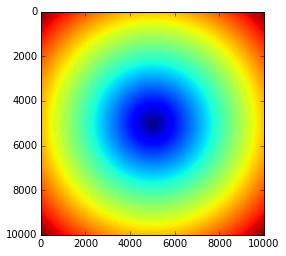

In [8]:
def rad_dist(n):
    x = np.arange(n)
    y = x[:, np.newaxis]
    r = (((n-1)/2-x)**2 + ((n-1)/2-y)**2)**0.5
    return r

r = rad_dist(10000)
print r[4],"\n\n", r[:,4]
plt.imshow(r)

#### Task 7.3

Take a photo of a snooker ball in space!  Create a $1024\times 1024$ array (the image), and consider a ball of radius 400 elements centred in the centre of the image.  The intensity of the light reflected toward us (assuming we are the source of light) can be computed e.g. by the cosine of $r$, the fraction of the projected distance from the centre to the edge of the visible disk (i.e. r = 0 at the centre of the ball and 1 at the edge).  The intensity is, of course, zero off the edge of the ball.  **Without using a loop**, compute the intensity in each element of the array, and then show the intensity array using the colour map `plt.cm.bone`:

```python
plt.imshow(intensity, cmap=plt.cm.bone)
```

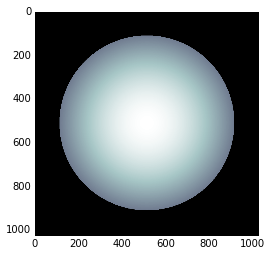

In [9]:
def ball():
    r = rad_dist(1024)
    return np.where(r < 400, np.cos(r*np.pi/800)+1, 0)

plt.imshow(ball(), cmap=plt.cm.bone)

## Operations looped over a dimension

Some Numpy functions can be specifed to act over only one dimension:

In [55]:
x = np.array([[1,2],[3,4]])
print x
print ''
print np.sum(x)
print ''
print np.sum(x, axis=0)
print ''
print np.mean(x, axis=1)
print ''
print np.prod(x, axis=1)

[[1 2]
 [3 4]]

10

[4 6]

[ 1.5  3.5]

[ 2 12]


<div class="alert alert-warning" style="width: 60%; margin-left: 20%; margin-top:20px">
<p>**IMPORTANT!**</p>
<p>Remember that zeroth axis is vertical (refers to row number) and the first axis is horizontal (refers to column number)!</p>
</div>

This behaviour is very useful for e.g. integrating over one coordinate.

### Matrix operations

Just like with 1D arrays, the temptation is to think of N-D NDarrays as matrices.  They can indeed be used to represent matrices but, as for vectors, we need to use Numpy functions to perform matrix operations.  Have a look at the following:

In [62]:
a = np.array([[5,6,3],[2,4,5],[1,4,2]])
b = np.array([[1,2,3],[2,4,5],[1,2,2]])

print 'a'
print a
print 'b'
print b
print '3'
print a*b
print '4'
print np.dot(a,b)
print '5'
print np.linalg.det(a)
print '6'
print np.linalg.inv(a)
print '7'
print a.T

a
[[5 6 3]
 [2 4 5]
 [1 4 2]]
b
[[1 2 3]
 [2 4 5]
 [1 2 2]]
3
[[ 5 12  9]
 [ 4 16 25]
 [ 1  8  4]]
4
[[20 40 51]
 [15 30 36]
 [11 22 27]]
5
-42.0
6
[[ 0.28571429  0.         -0.42857143]
 [-0.02380952 -0.16666667  0.45238095]
 [-0.0952381   0.33333333 -0.19047619]]
7
[[5 2 1]
 [6 4 4]
 [3 5 2]]


On lines 9, 11, 13, 15, and 17 we have multiplied the arrays element-wise, performed matrix multiplication, computed the determinant and inverse of matrix `a`, and found the transpose of `a`, respectively.  The module name "linalg" stands for:

#### Linear algebra

Numpy's matrix operations can be used to perform linear algebra.  You may recall from the Maths course that we can write sets of simultaneous equations using matrices.  For example, 

$$x-z = 5$$
$$-2x+3y=1$$
$$x-3y+2z=-10$$

can be written in matrix form as

$$\begin{pmatrix} 1 & 0 & -1 \\ -2 & 3 & 0 \\ 1 & -3 & 2 \end{pmatrix} \begin{pmatrix} x \\ y \\ z \end{pmatrix} = \begin{pmatrix} 5 \\ 1 \\ -10 \end{pmatrix}$$

or

$$\mathrm{Mr=k}\;\;,$$

which can be solved by finding 

$$\mathrm{r=M^{-1}k}\;\;.$$

This is easily achieved using the following code:

In [63]:
m = [[1,0,-1],[-2,3,0],[1,-3,2]]
k =[[5],[1],[-10]]
r = np.linalg.solve(m,k)
print r

[[ 1.]
 [ 1.]
 [-4.]]


which means the solution is

$$\mathrm{r}=\begin{pmatrix} x \\ y \\ z \end{pmatrix} =\begin{pmatrix} 1 \\ 1 \\ -4 \end{pmatrix}\;\;,$$

or $x=1, y=1, z=-4$.  In this case, you can check this yourself using elementary methods, but if this process needs to be repeated a million times it's convenient to let the computer do it for you!

Recall that matrices can be used to represent rotations.  If, following a matrix transformation on a vector $\mathbf{r}$, the resulting vector $\mathbf{R}$ is in the same direction as the original vector $\mathbf{r}$, but with a length that is multiplied by some scalar factor $\lambda$, then the vector $\mathbf{r}$ is said to be an *eigenvector* of the matrix, and the associated value of the scalar $\lambda$ is said to be an *eigenvalue*. More generally, an *eigenvalue problem* is one in which we end up with something of the form

$$\mathrm{Mr}=\lambda\mathrm{r}\;\;,$$

which could arise when we have systems of simultaneous equations, for example.  Let's say we end up with the following:

$$\begin{pmatrix} 2 & 3 \\ 3 & 2 \end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix} = \lambda \begin{pmatrix} x \\ y \end{pmatrix}$$

Before we get Numpy to do all the work for us, let's make sure we understand how to obtain the eigenvalues and eigenvectors for an eigenvalue problem like this. To do so, we obtain and solve its *characteristic equation*, which is generated by subtracting $\lambda$ from the main diagonal of the matrix and setting the determinant of the resulting matrix to be equal to zero. Like this:

$$\begin{vmatrix} 2 - \lambda & 3 \\ 3 & 2 - \lambda \end{vmatrix} = 0\;\;.$$

Recall that the determinant of a $2\times2$ matrix $\begin{vmatrix} a & b \\ c & d \end{vmatrix} = ad - bc$.  We therefore have

$$(2 - \lambda)(2 - \lambda) - 9 = 0\;\;,$$

or

$$\lambda^2 - 4\lambda - 5 = 0\;\;,$$

which has the solutions $\lambda=-1,5$.  These are the eigenvalues, and we substitute them back in to (any of) the original equations we find the eigenvectors, which lie along the directions of the lines $y=-x$ and $y=x$.

OK, let's do this using Numpy:

In [86]:
m = np.array([[2,3],[3,2]])
evals, evects = np.linalg.eig(m)
print vals, evects

[ 5. -1.] [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


The eigenvalues are returned are 5 and -1, consistent with our calculations above, and the eigenvectors (normalised, such that their magntitude is 1), point along the directions of $y=-x$ and $y=x$, as we calculated.

#### Task 7.4

The Fibonnaci numbers are a famous sequence, appearing in natural patterns in nature and numerous areas of culture and technology, in which each number is generated from the sum of the previous two.  This process can be written as a matrix equation:

$$\begin{pmatrix} 1 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} x_n \\ x_{n-1} \end{pmatrix} = \begin{pmatrix} x_{n+1} \\ x_n \end{pmatrix}\;\;.$$

In general, iteration of a matrix operation (i.e. repeated application where the $n+1^{th}$ result is given by operation on the $n^{th}$ result) converges toward an eigenvector - the one associated with the largest eigenvalue.  Calculate and print the largest eigenvalue of the above matrix. You should find it to be a somewhat venerated number (given by the value to which the ratios of consecutive Fibonnaci numbers converge).

In [134]:
m = np.array([[1,1], [1,0]])
evals, evects = np.linalg.eig(m)
v = evals > 0
print evals[v]

[ 1.61803399]


#### Task 7.5

Consider a system in which two identical bodies of mass $m$ sit on a frictionless surface and are coupled by springs with spring constants $5k$, $k$, and $5k$, to each other and two immovable walls as in the following figure:

<img src="coupled_eigen.png" width="70%" style="display: inline-block; margin-top: 5px;">

If the displacement of the masses from the unstretched, equilibrium positions are $x$ and $y$, Hooke's Law and Newton's Second Law yield the following equations of motion for the two springs:

$$m\ddot{x} = -5kx + k(y-x)\;\;,$$
$$m\ddot{y} = -k(y-x) - 5ky\;\;.$$

In general, these two masses will oscillate at different frequencies, depending on their initial displacements.  It is possible, however, to start the system in such a way that both the masses oscillate back and forth at the same frequency.  This is the *normal mode*, or the *eigenmode* of the system, defined as the mode in which all the different parts vibrate with the same angular frequency, $\omega$, called the *eigenfrequency*.  Not surprisingly, we find the conditions for the eigenmode by computing the eigenvalues and eigenvectors. 

If our system oscillates with the angular frequency $\omega$, it's reasonable to assume a solution of the form $x = x_0e^{i\omega t}$ and $y = y_0e^{i\omega t}$. Differentiating twice, we obtain

$$\ddot{x}=-\omega^2 x\;\;,$$
$$\ddot{y}=-\omega^2 y\;\;,$$

which we can substitute into our equations of motion to obtain

$$-m\omega^2 x = -5kx + k(y-x)\;\;,$$
$$-m\omega^2 y = -k(y-x) - 5ky\;\;.$$

Using the substitution $\lambda = \frac{m\omega^2}{k}$, compute the eigenvalues, and thus the eigenfrequencies of the system, and deduce from the eigenvectors the direction of motion of the two masses relative to one another in these two modes of vibration.  What values in Hz do the vibration frequencies take if $m=k=1$?

In [3]:
xy = np.array([[6,-1],[-1,6]])
evals, evects = np.linalg.eig(xy)
print evects
freq = evals**0.5/(2*np.pi)
print freq

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[ 0.4210844   0.35588127]


### RecArrays and reading in data from files

We finally mention a further Numpy type useful for data analysis, derived from `NDArray`s, and called the `RecArray`, or *Record Array*.  We have already met the Python `dict`:

In [ ]:
d = {'key1':2, 'key2':['sausage', 'spam', 4.5]}
print d['key2']

These are useful for containing small amounts of different types of data, but arrays of `dict`s are accessed via Python loops, which are slow, thus limiting the usefulness of `dict`s for storing large volumes of data.  For example, let's say we have a spacecraft instrument that repeatedly measures three components of the ambient magnetic field, $B_x$, $B_y$, and $B_z$, and records them in a file along with a timestamp.  This file could in principle contain many thousands of individual records, each identical except for the values.  Reading in and looping over these data in Python `dict`s would be painfully slow; this is where the `RecArray` comes in.  We can in principle define a `RecArray` manually:

In [168]:
ndarr = np.rec.array([(2, 1.5, 3),
                      (0, 2.2, 0)],
                      dtype=[('x', 'int'), ('y', 'float'), ('z', 'int')])
print ndarr[0]
print ndarr.y
print ndarr.y[0]

(2, 1.5, 3)
[ 1.5  2.2]
1.5


Here each record is defined from a tuple - the first record is `(2, 1.5, 3)`, for example.  However, we can also access each column by the names given in the definition, and `ndarr.y` returns the column of values of `y`: `[1.5, 2.2]`.  This is what makes NDArrays so much better for dealing with data than `dict`s.

However, it's rare that we will actually wish to define a RecArray manually; their use lies in processing large volume of data, after all.  Fortunately, Numpy provides very convenient functions for reading in data from files.  Data files can be either in some kind of binary format (memory-efficient and quick to access, but not human-readable) or ASCII text format (human-readable, but bulky and slow to read and write).  We will concentrate here on ASCII-formatted files, but note that IO ("input-output") procedures are available for the many binary formats out there (see e.g. the docs on the Numpy functions `save` and `load`, for example).  

An outrageously useful function for reading data from a text file and dumping it into a recarray is called, obviously, `recfromtxt`, and its use is demonstrated in the following cell:


('date', 'time', 'hlon', 'hlat', 'r', 'rdot')
('1997-Oct-16', '00:00', 22.6208, 0.0137, 0.997922579321, 2.343983)


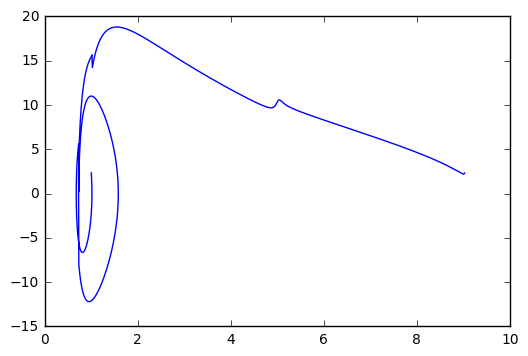

In [6]:
datafile = 'cassini_coords.txt'
scdat = np.recfromtxt(datafile, skip_header=103, skip_footer=47, 
                      names=['date', 'time', 'hlon', 'hlat', 'r', 'rdot'])
print scdat.dtype.names
print scdat[0]
plt.plot(scdat.r, scdat.rdot)

This function has just saved you a *lot* of time.  You have provided only the name of the file, the lengths of the header and footer (lines at the top and bottom of the file that are not data, but contain information about it; these are obtained from inspection of the file), and some names for the columns. The function has opened the data file, read in each line of it, automatically split the lines into strings or numbers, converted the lot to a recarray, and closed the file.  We can see that the recarray columns are faithfully named, and we have also printed the first record and plotted one column versus another (in this case these are the distance of Cassini from the Sun during its interplanetary cruise, and its rate of change). 

#### Task 7.6

Read in the contents of the file 'rev26_27.dat' into a RecArray.  This is a data file containing Cassini magnetometer measurements from two orbits around Saturn in 2007. The columns are day-of-year since 2004, and three field components in spherical polar coordinates ($B_r$, $B_\theta$, $B_\varphi$).  Print the first record, and also print the $B_r$ values.  Find the mean and standard deviation of the $B_r$ values. Plot $B_r$ vs. time (in day-of-year-2004)


(934.909028, -1.406273, -9.233887, 4.421532)
[-1.406273 -1.392281 -1.406921 ..., -4.003166 -3.976837 -3.979042]
0.375017986809
2.47614668389


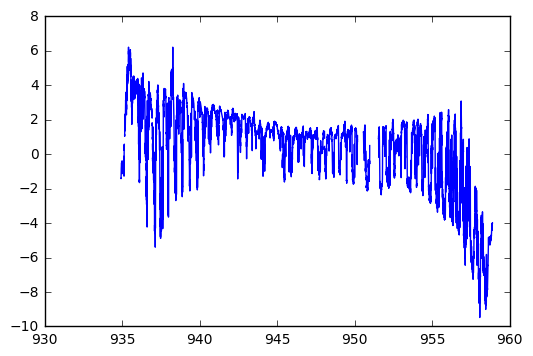

In [8]:
data = "rev26_27.dat"
recdat = np.recfromtxt(data, names = ["time", "r", "theta", "phi"])
print recdat[0]
print recdat.r
print np.nanmean(recdat.r)
print np.nanstd(recdat.r)
plt.plot(recdat.time, recdat.r)

<div class="alert alert-success" style="width: 60%; margin-left: 20%; margin-top:20px">
<p>**INFO**</p>
<p>When printing large arrays, IPython truncates large arrays to show you the first few and the last few elements.  This behaviour can be changed. For example, setting np.set_printoptions(threshold=np.nan) will print the whole array.</p>
</div>

<div class="alert alert-danger" style="width: 60%; margin-left: 20%; margin-top:20px">
<p>**Checkpoint: Please have the above marked and signed off by a demonstrator before continuing**</p>
</div>